In [91]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("merged_data/final_merged.csv")
print(df.describe())
print(df.info())

             budget      runtime      screens  opening_week  \
count  3.008000e+03  3008.000000  3008.000000  3.008000e+03   
mean   4.937433e+07   109.340093  2448.171875  1.853001e+07   
std    5.158096e+07    17.775276  1139.896276  2.612501e+07   
min    7.000000e+03    68.000000     1.000000  1.450000e+03   
25%    1.500000e+07    96.000000  1792.000000  3.604586e+06   
50%    3.000000e+07   107.000000  2706.500000  1.101502e+07   
75%    6.500000e+07   119.000000  3230.000000  2.251831e+07   
max    4.000000e+08   219.000000  4662.000000  3.571150e+08   

       domestic_box_office      ratings     user_vote  critic_vote  \
count         3.008000e+03  3008.000000  3.008000e+03  3008.000000   
mean          6.307289e+07     6.335572  2.926924e+05   185.700798   
std           8.294543e+07     0.998941  1.484667e+06   101.092981   
min           2.139800e+04     1.500000  7.100000e+01     4.000000   
25%           1.468143e+07     5.800000  4.300000e+04   121.000000   
50%         

In [94]:
df.head(5)

,movie_name,mpaa,budget,runtime,screens,opening_week,domestic_box_office,ratings,user_vote,country,genres,critic_vote,meta_score,sequel,month,year
0,10 Cloverfield Lane,PG-13,15000000.0,103.0,3427.0,24727437.0,72082999.0,7.2,355000.0,United States,Drama Horror Mystery Sci-Fi Thriller,358.0,88.32,0,3.0,2016.0
1,10000 BC,PG-13,105000000.0,109.0,3454.0,35867488.0,94784201.0,5.1,136000.0,United States South Africa,Action Adventure Drama Fantasy History,29.0,34.00,0,3.0,2008.0
2,102 Dalmatians,G,85000000.0,100.0,2704.0,19883351.0,66957026.0,4.8,40000.0,United States,Adventure Comedy Family,114.0,31.05,0,11.0,2000.0
3,12 Rounds,PG-13,20000000.0,108.0,2331.0,5329240.0,12234694.0,5.6,31000.0,United States,Action Crime Thriller,85.0,32.07,0,3.0,2009.0
4,12 Strong,R,35000000.0,130.0,3018.0,15815025.0,45819713.0,6.5,92000.0,United States,Action Drama History War,216.0,50.80,0,1.0,2018.0


In [107]:
df = df.dropna(
    subset=[
        "movie_name",
        "month",
        "year",
        "mpaa",
        "budget",
        "runtime",
        "screens",
        "opening_week",
        "domestic_box_office",
    ]
)

In [108]:
df.isnull().sum()



movie_name             0
mpaa                   0
budget                 0
runtime                0
screens                0
opening_week           0
domestic_box_office    0
ratings                0
user_vote              0
country                0
genres                 0
critic_vote            0
meta_score             0
sequel                 0
month                  0
year                   0
dtype: int64

In [4]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("merged_data/final_merged.csv")

# Tách các thể loại từ chuỗi và tạo thành một Series mới
genre_series = data["genres"].str.split(expand=True).stack()

# Tính số lượng phim thuộc mỗi thể loại
genre_counts = genre_series.value_counts()

# Hiển thị số lượng phim thuộc mỗi thể loại
print(genre_counts)

keyword = "music"
movie_names = df["movie_name"].str.contains(keyword, case=False)
movies_with_music = df[movie_names]

print(movies_with_music["movie_name"])

Drama          1501
Comedy         1267
Thriller        911
Action          891
Adventure       741
Romance         670
Crime           549
Fantasy         480
Family          436
Sci-Fi          432
Mystery         426
Horror          325
Biography       258
Animation       205
Musical         202
History         136
Sport           133
War             115
Western          44
Documentary      38
Name: count, dtype: int64
999     High School Musical 3: Senior Year
1522                      Music and Lyrics
Name: movie_name, dtype: object


In [110]:
df.dropna(subset=["month","year","runtime","budget","mpaa","screens","opening_week","domestic_box_office"], inplace=True)
row_count = df.shape[0]
print(row_count)

3008


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_name           3008 non-null   object 
 1   mpaa                 3008 non-null   object 
 2   budget               3008 non-null   float64
 3   runtime              3008 non-null   float64
 4   screens              3008 non-null   float64
 5   opening_week         3008 non-null   float64
 6   domestic_box_office  3008 non-null   float64
 7   ratings              3008 non-null   float64
 8   user_vote            3008 non-null   float64
 9   country              3008 non-null   object 
 10  genres               3008 non-null   object 
 11  critic_vote          3008 non-null   float64
 12  meta_score           3008 non-null   float64
 13  sequel               3008 non-null   int64  
 14  month                3008 non-null   float64
 15  year                 3008 non-null   f

In [111]:
features_numerical = (
    df.select_dtypes(exclude=["object"]).copy()
)

In [112]:
features_numerical.columns

Index(['budget', 'runtime', 'screens', 'opening_week', 'domestic_box_office',
       'ratings', 'user_vote', 'critic_vote', 'meta_score', 'sequel', 'month',
       'year'],
      dtype='object')

In [113]:
features_categorical = df.select_dtypes(include=["object"]).copy()
features_categorical.columns

Index(['movie_name', 'mpaa', 'country', 'genres'], dtype='object')

In [114]:
features_numerical = features_numerical.drop("domestic_box_office", axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17008\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17008\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be remove

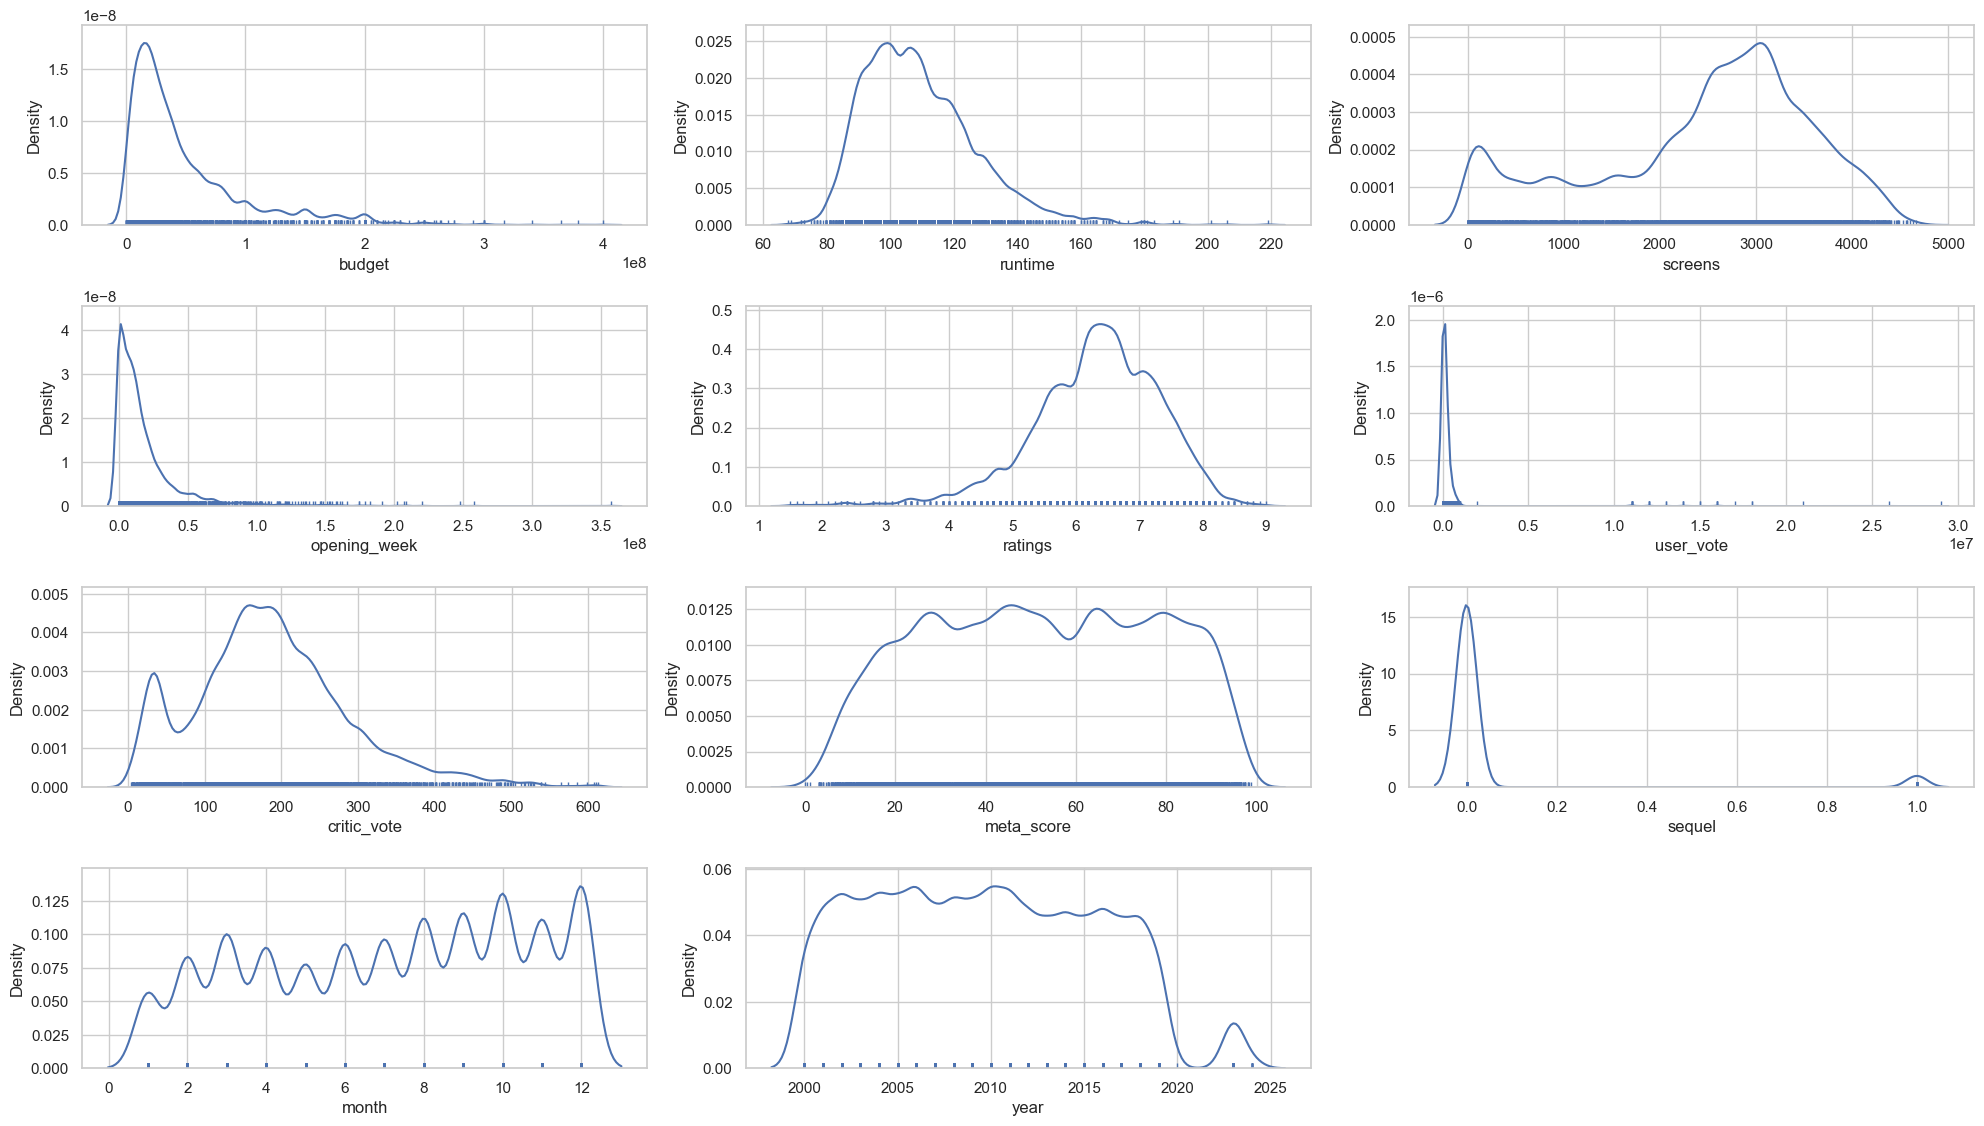

In [115]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 3, i + 1)
    sns.distplot(
        features_numerical.iloc[:, i].dropna(),
        rug=True,
        hist=False,
        kde_kws={"bw": 0.1},
        color="b",
    )
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

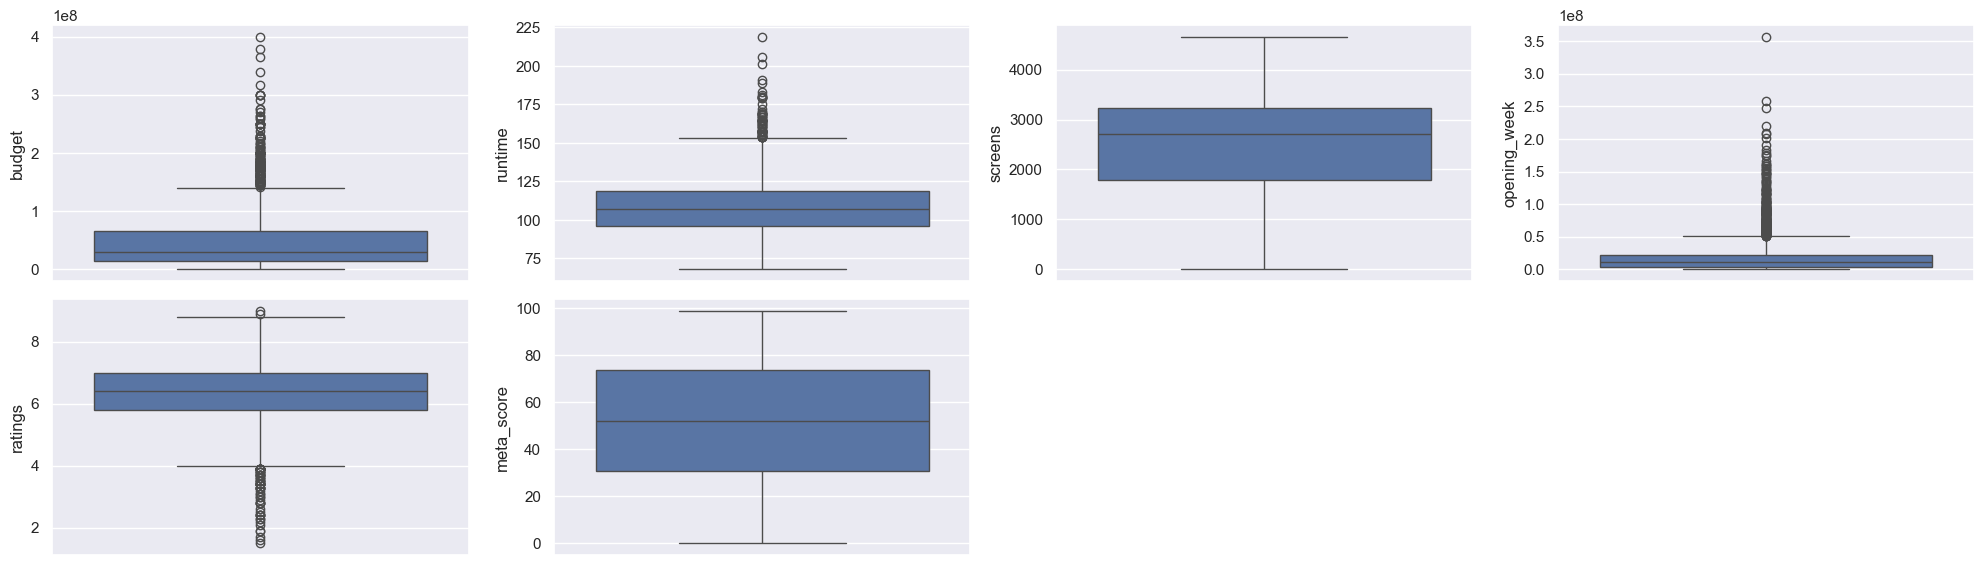

In [116]:
fig = plt.figure(figsize=(20, 25))
features_numerical_1 = features_numerical.drop(["sequel", "user_vote", "critic_vote", "month", "year"], axis=1)
sns.set(style="darkgrid")
for i in range(len(features_numerical_1.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical_1.iloc[:, i].dropna())
plt.tight_layout()

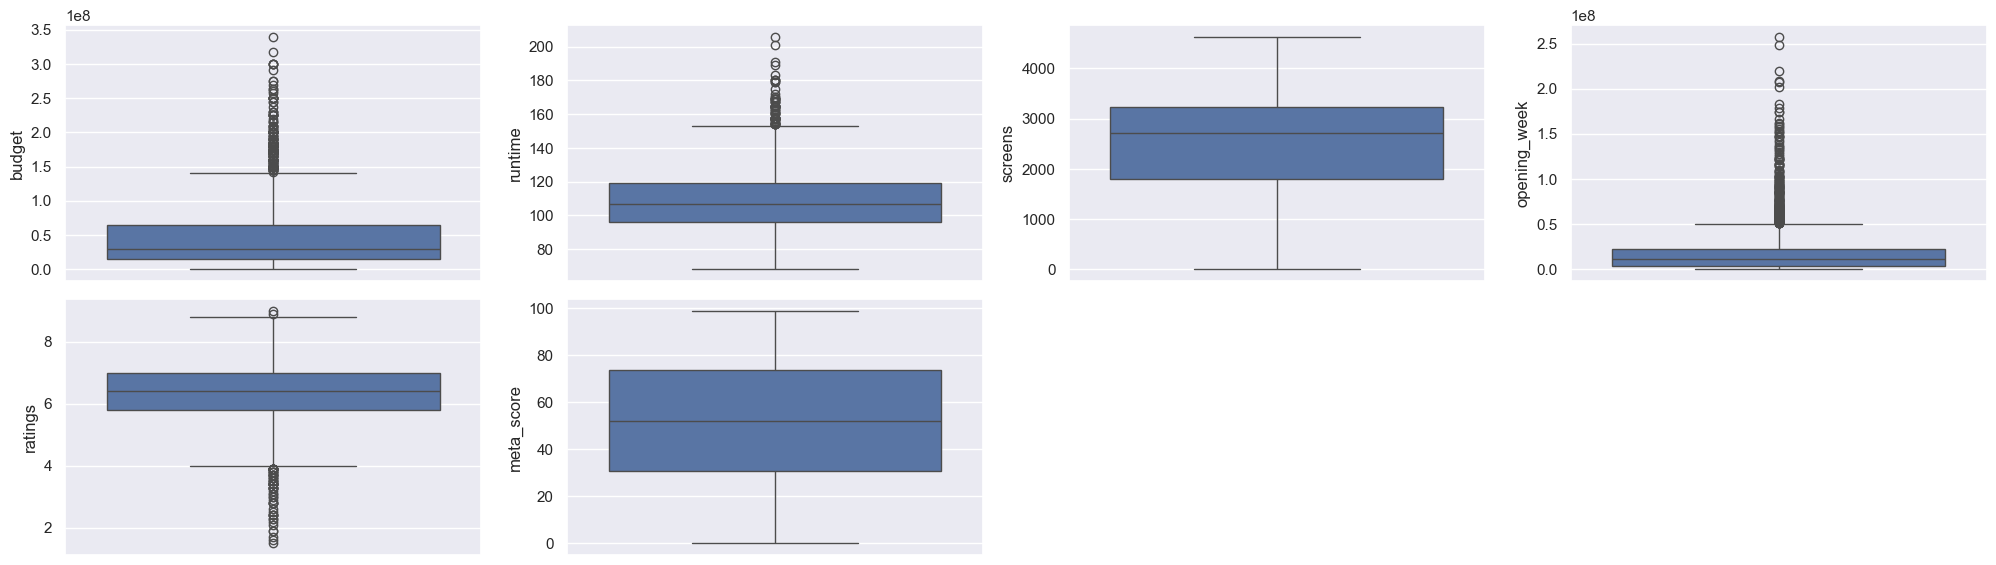

In [119]:
fig = plt.figure(figsize=(20, 25))
features_numerical_1 = features_numerical.drop(["sequel", "user_vote", "critic_vote", "month", "year"], axis=1)

top_3_values = features_numerical_1['budget'].nlargest(3)

for value in top_3_values:
    features_numerical_1 = features_numerical_1[features_numerical_1['budget'] != value]
    df = df[df['budget'] != value]

top_1_values = features_numerical_1['runtime'].nlargest(1)

for value in top_1_values:
    features_numerical_1 = features_numerical_1[features_numerical_1['runtime'] != value]
    df = df[df['runtime'] != value]

sns.set(style="darkgrid")
for i in range(len(features_numerical_1.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical_1.iloc[:, i].dropna())
plt.tight_layout()

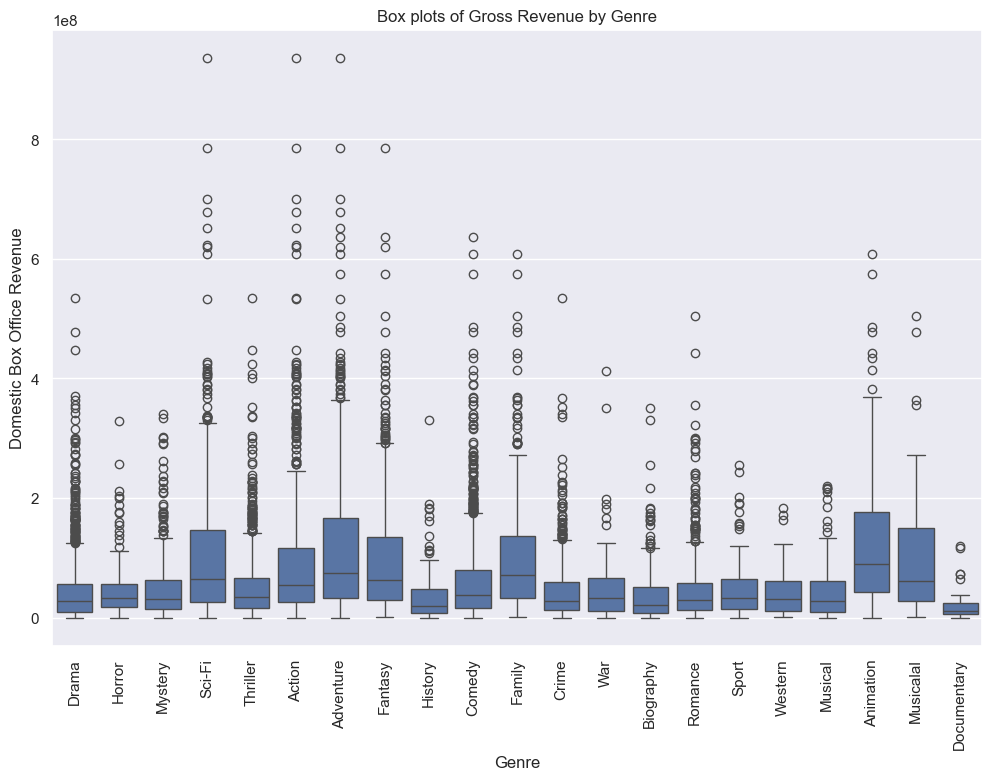

In [120]:
df_genres = df.assign(genres=df["genres"].str.split(" ")).explode("genres")

# Step 4: Create the box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_genres, x="genres", y="domestic_box_office")
plt.xticks(rotation=90)
plt.title("Box plots of Gross Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Domestic Box Office Revenue")
plt.show()

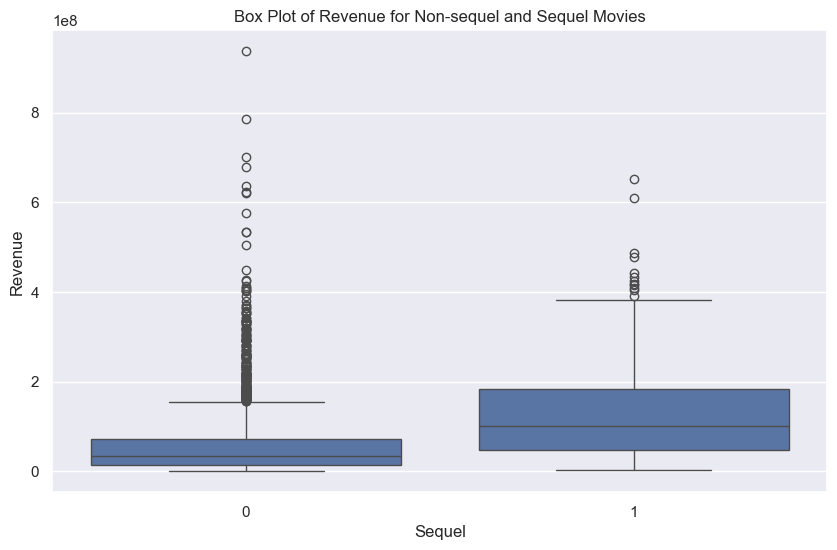

In [121]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="sequel", y="domestic_box_office", data=df)

plt.xlabel("Sequel")
plt.ylabel("Revenue")
plt.title("Box Plot of Revenue for Non-sequel and Sequel Movies")

plt.show()

In [122]:
outliers = df[["budget","runtime","screens","opening_week", "ratings", "meta_score"]]

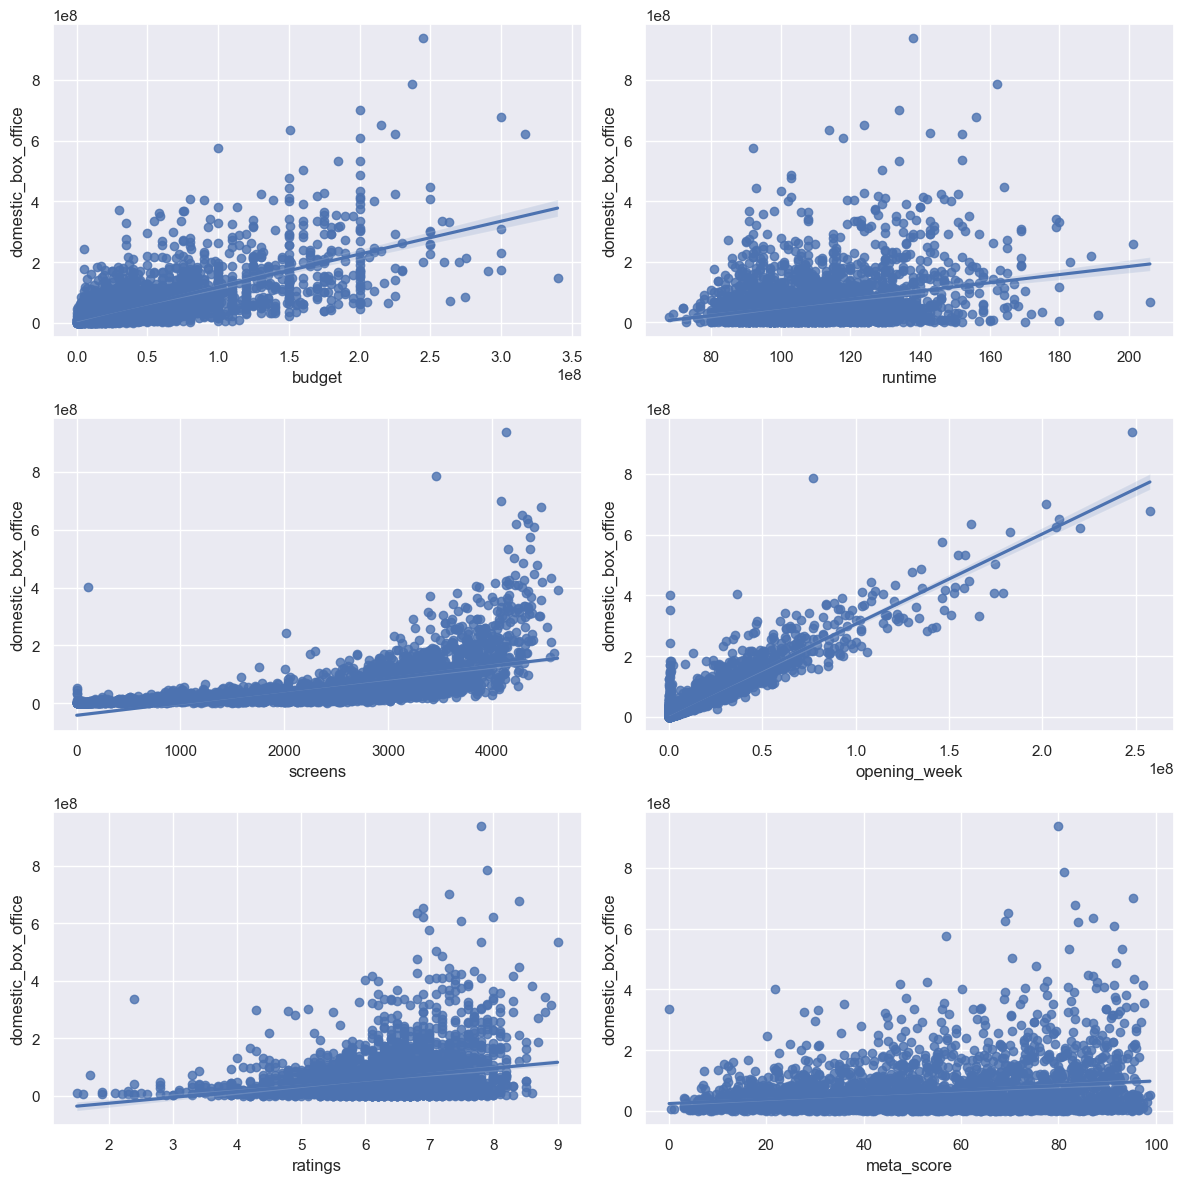

In [124]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    if i < len(outliers.columns):
        sns.regplot(x=outliers.iloc[:, i], y=df.domestic_box_office, ax=ax)

plt.tight_layout()
plt.show()

2016.0
Number of movie:  149
2008.0
Number of movie:  158
2009.0
Number of movie:  150
2018.0
Number of movie:  143
2013.0
Number of movie:  135
2010.0
Number of movie:  167
2004.0
Number of movie:  162
2007.0
Number of movie:  142
2001.0
Number of movie:  148
2006.0
Number of movie:  171
2003.0
Number of movie:  148
2019.0
Number of movie:  113
2012.0
Number of movie:  143
2014.0
Number of movie:  144
2002.0
Number of movie:  162
2011.0
Number of movie:  164
2017.0
Number of movie:  133
2023.0
Number of movie:  58
2015.0
Number of movie:  134
2005.0
Number of movie:  154
2020.0
Number of movie:  1


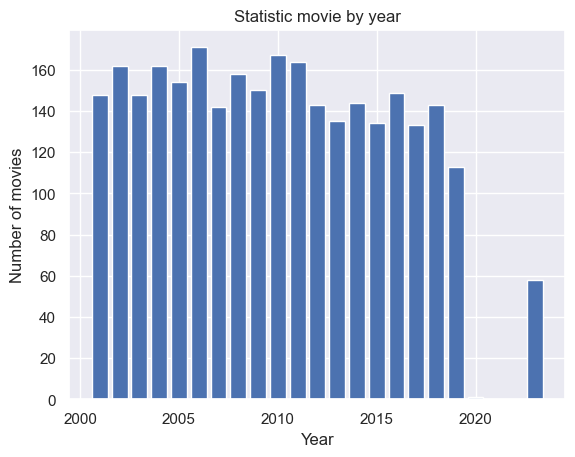

In [ ]:
df = df[(df["year"] >= 2001) & (df["year"] <= 2023)]
years=df['year'].unique()
number_movie = []
for y in years:
    print(y)
    print("Number of movie: ",df[df["year"] == y]["movie_name"].count())
    number_movie.append(df[df['year']==y]['movie_name'].count())
plt.bar(years, number_movie)
plt.title("Statistic movie by year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

domestic_box_office
(0.0, 50000000.0]             1755
(50000000.0, 100000000.0]      585
(100000000.0, 150000000.0]     243
(150000000.0, 200000000.0]     117
(200000000.0, 250000000.0]      65
(250000000.0, 300000000.0]      36
(300000000.0, 350000000.0]      30
(400000000.0, 450000000.0]      16
(350000000.0, 400000000.0]      15
(450000000.0, 500000000.0]       3
Name: count, dtype: int64


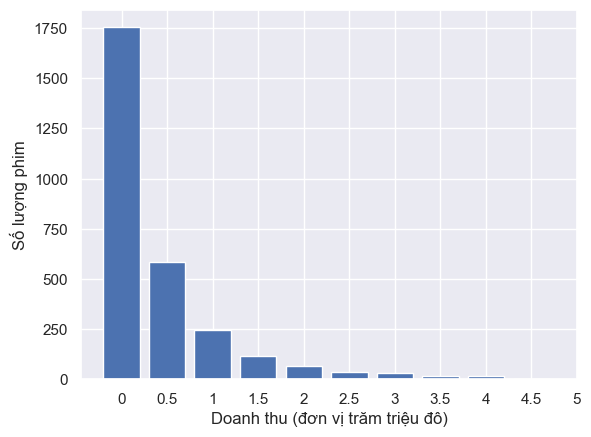

In [ ]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter


bins = [
    0,
    0.5e8,
    1e8,
    1.5e8,
    2e8,
    2.5e8,
    3e8,
    3.5e8,
    4e8,
    4.5e8,
    5e8,
]  



categories = pd.cut(df["domestic_box_office"], bins)

revenue_counts = categories.value_counts()

print(revenue_counts)

plt.bar([str(cat) for cat in revenue_counts.index], revenue_counts)

plt.xlabel("Doanh thu (đơn vị trăm triệu đô)")
plt.ylabel("Số lượng phim")

x_labels = ['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'] 
plt.xticks(range(len(x_labels)), x_labels)

# plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

plt.show()

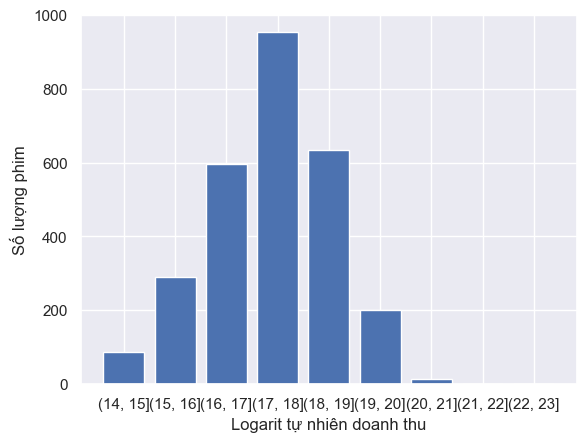

In [ ]:
df["log_revenue"] = np.log(df["domestic_box_office"])

log_bins = [
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
]  

log_categories = pd.cut(df["log_revenue"], log_bins)

log_revenue_counts = log_categories.value_counts()
log_revenue_counts = log_revenue_counts.sort_index()

plt.bar([str(cat) for cat in log_revenue_counts.index], log_revenue_counts)

plt.xlabel("Logarit tự nhiên doanh thu")
plt.ylabel("Số lượng phim")

plt.show()

<Figure size 1000x800 with 0 Axes>

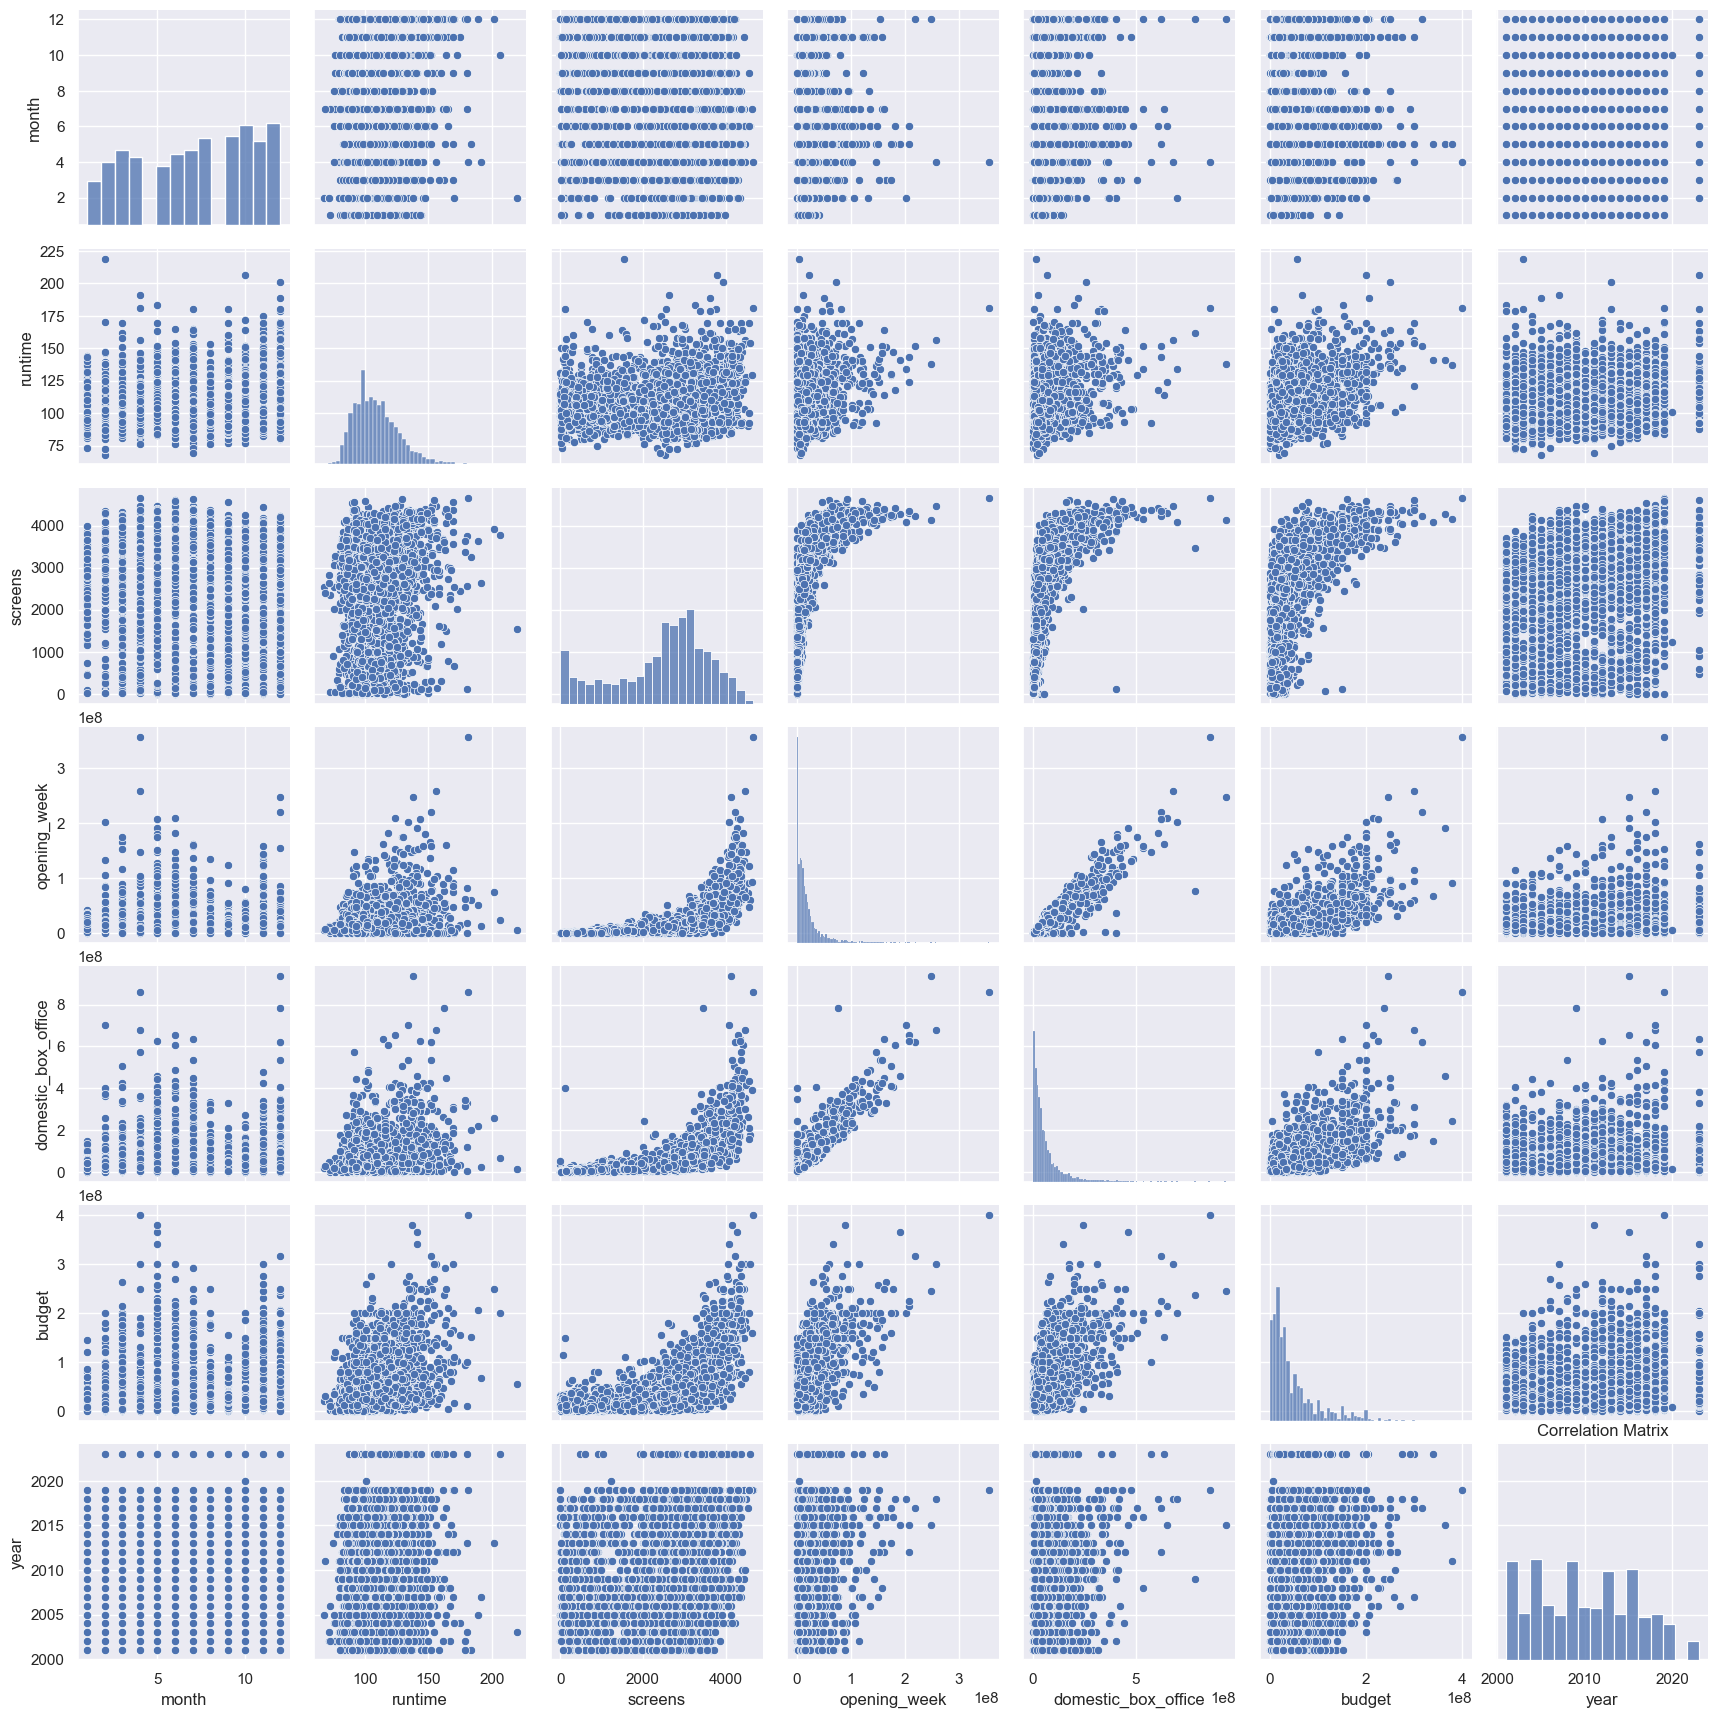

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.pairplot(df[columns])
plt.title("Correlation Matrix")
plt.show()

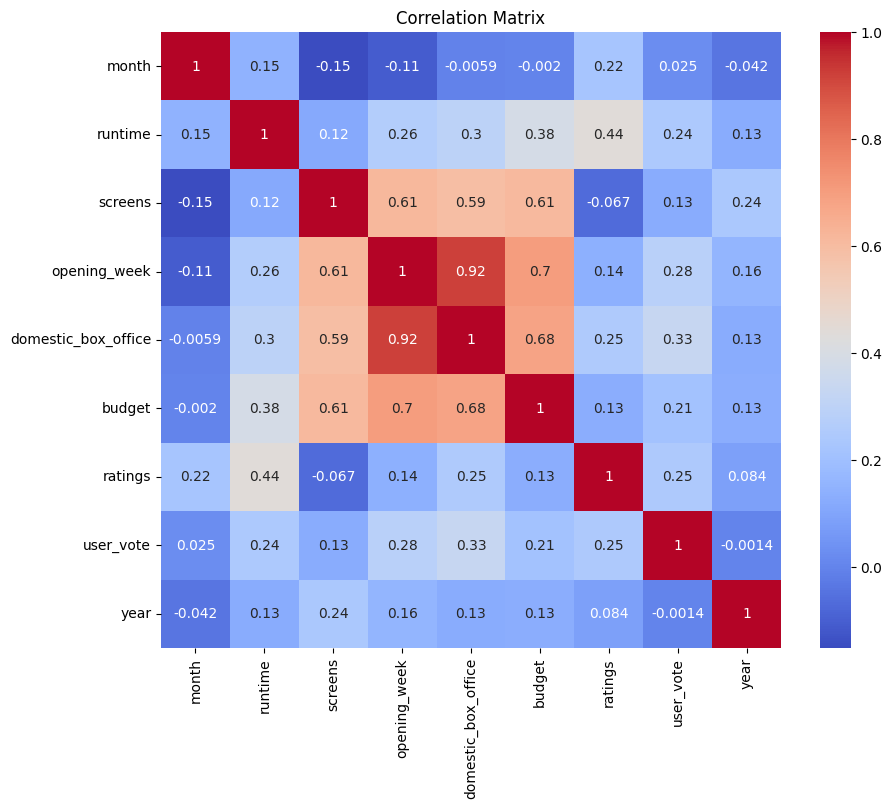

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "ratings",
    "user_vote",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("merged_data/final_merged.csv")

# Transform genres column into binary columns
unique_genres = set(genre for sublist in df['genres'].str.split() for genre in sublist)
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x.split() else 0)
df = df.drop(columns=['genres'])

# Select necessary columns for EFA and prediction
selected_columns = [
    "month", "year", "mpaa", "budget", "runtime", "screens",
    "opening_week", "domestic_box_office", "user_vote", "ratings",
    'critic_vote', 'meta_score', "country"
] + list(unique_genres)
df = df[selected_columns]

# Drop rows with NaN values
df.dropna(inplace=True)


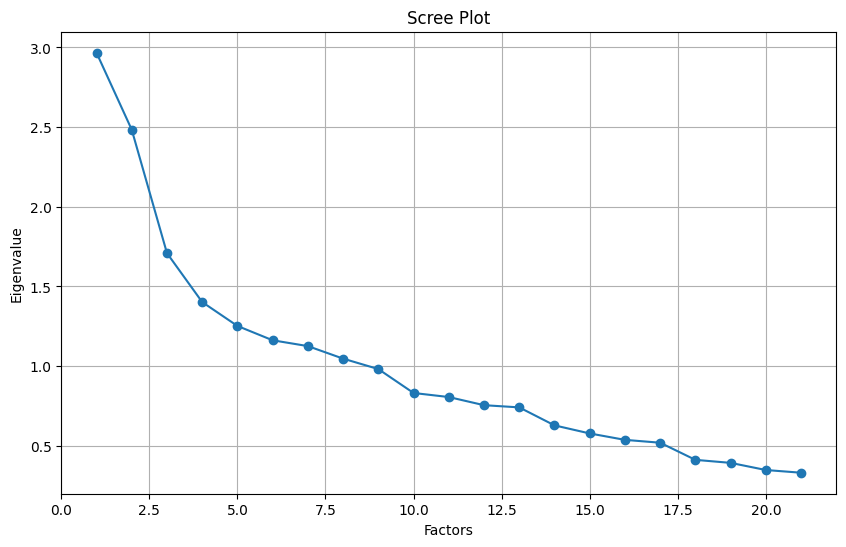

              Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
Documentary -0.052027 -0.025432 -0.022419  0.060208  0.001965  0.025450   
Music       -0.019638 -0.096444 -0.093077 -0.030908 -0.041198 -0.014939   
Adventure    0.592463  0.481099 -0.116427  0.010824 -0.096635 -0.065646   
Family       0.821743 -0.053355 -0.100224 -0.090835 -0.007932  0.045948   
Crime       -0.126209 -0.010815  0.056715 -0.052591  0.789378 -0.043806   
History     -0.026556 -0.076610  0.018941  0.639049 -0.011638  0.219721   
Action      -0.041492  0.774708 -0.049506  0.063668  0.209198 -0.131209   
Romance     -0.107458 -0.308553 -0.308454 -0.048543 -0.230068 -0.167528   
Musical      0.287585 -0.094526 -0.046439 -0.016655 -0.006939 -0.069503   
Biography   -0.093848 -0.106793 -0.026306  0.336500  0.016544  0.547209   
Thriller    -0.211123  0.238162  0.559975  0.014982  0.327863 -0.165573   
War         -0.043134  0.012718 -0.017141  0.453998 -0.047183 -0.037558   
Horror      -0.074354 -0.

In [ ]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Step 2: Load your dataset
# Assuming your data is in a CSV file named 'movies.csv'

# Step 3: Select the genre columns for EFA
genre_columns = [
    "short",
    "drama",
    "comedy",
    "documentary",
    "action",
    "romance",
    "thriller",
    "horror",
    "adventure",
    "crime",
    "family",
    "fantasy",
    "animation",
    "biography",
    "sci-Fi",
    "mystery",
    "musical",
    "war",
    "history",
    "sport",
    "western",
    "film_noir",
    "adult",
]

import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = pd.read_csv("merged_data/final_merged.csv")
# Step 3: Extract unique genres and create binary columns
# Split the genres column into individual genres
unique_genres = set(genre for sublist in df["genres"].str.split() for genre in sublist)

# Initialize binary columns for each genre
for genre in unique_genres:
    df[genre] = df["genres"].apply(lambda x: 1 if genre in x.split() else 0)

# Drop the original genres column as it's no longer needed
df = df.drop(columns=["genres"])

# Optionally, drop other non-numeric or non-relevant columns for EFA
non_genre_columns = [
    "tt_id",
    "rl_id",
    "movie_name",
    "mpaa",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "ratings",
    "user_vote",
    "country",
    "critic_vote",
    "meta_score",
    "sequel",
    "month",
    "year",
]
df_genres = df.drop(columns=non_genre_columns)

# Step 4: Standardize the data
scaler = StandardScaler()
genres_data_scaled = scaler.fit_transform(df_genres)

# Step 5: Determine the number of factors to retain using Kaiser criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=len(df_genres.columns), rotation=None)
fa.fit(genres_data_scaled)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Plot eigenvalues to visualize the Kaiser criterion
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_genres.columns) + 1), eigenvalues, marker="o")
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

# Step 6: Apply EFA with the appropriate number of factors
# From the scree plot, let's assume we decide to retain 5 factors
n_factors = 8
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(genres_data_scaled)

# Step 7: Get the factor loadings
loadings = fa.loadings_

# Create a DataFrame to see the loadings
loadings_df = pd.DataFrame(
    loadings,
    index=df_genres.columns,
    columns=[f"Factor{i+1}" for i in range(n_factors)],
)
print(loadings_df)

# Optional: Inspect the results by looking at high loadings for each factor
# Typically, we consider loadings > 0.4 as significant
print("\nSignificant Loadings (absolute value > 0.4):")
print(loadings_df[loadings_df.abs() > 0.4].dropna(how="all"))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Đọc dữ liệu từ file CSV
data = pd.read_csv("merged_data/final_merged.csv")

# Lựa chọn các cột cần thiết
selected_columns = [
    "month",
    "year",
    "mpaa",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "user_vote",
    "ratings",
    'critic_vote',
    'meta_score',
    "country",
]
data = data[selected_columns]

# Loại bỏ dòng có giá trị NaN
data.dropna(inplace=True)
# Chuyển đổi thuộc tính mpaa và country sang dạng số
mpaa_label_encoder = LabelEncoder()
country_label_encoder = LabelEncoder()
data["mpaa"] = mpaa_label_encoder.fit_transform(data["mpaa"])
data["country"] = country_label_encoder.fit_transform(data["country"])


# Tạo features và target
X = data.drop("domestic_box_office", axis=1)
y = data["domestic_box_office"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tiền xử lý dữ liệu và áp dụng mô hình Random Forest
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    "ratings",
    'critic_vote',
    'meta_score',
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=150,random_state=42)),
    ]
)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# 47 Meters Down,5.0,2017.0,PG-13,5300000.0,89.0,2270.0,11205562.0,44307193.0,18326512.0,62633705.0,United States,
# 47 Meters Down: Uncaged,8.0,2019.0,PG-13,12000000.0,89.0,2853.0,8427265.0,22260900.0,25321663.0,47582563.0,"United Kingdom, United States",
# 47 Ronin,12.0,2013.0,PG-13,175000000.0,127.0,2689.0,9910310.0,38362475.0,113354340.0,151716815.0,United States,
# 50 First Dates,3.0,2004.0,PG-13,75000000.0,96.0,3591.0,39852237.0,120776832.0,75543497.0,196320329.0,United States,

movie = {
    "month": 5.0,
    "year": 2017.0,
    "mpaa": "PG-13",
    "budget": 5300000.0,
    "runtime": 89.0,
    "screens": 2270.0,
    "opening_week": 11205562.0,
    "country": "United States",
    "user_vote": 5.6,
    "ratings": 61000.0,
    'critic_vote':103.0,
    'meta_score':5.0,
}
# Chuyển đổi thuộc tính mpaa và country sang dạng số
movie["mpaa"] = mpaa_label_encoder.transform([movie["mpaa"]])[0]
movie["country"] = country_label_encoder.transform([movie["country"]])[0]

# Tạo một DataFrame từ dictionary movie
movie_df = pd.DataFrame([movie])
print(movie_df)

# Tiền xử lý dữ liệu của phim cần dự đoán
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    'critic_vote',
    'meta_score',
    "ratings",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# Dự đoán doanh thu của phim
revenue_predict = pipeline.predict(movie_df)

print("Predicted revenue:", revenue_predict)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

['G' 'NC-17' 'PG' 'PG-13' 'R']
   month    year  mpaa     budget  runtime  screens  opening_week  country  \
0    5.0  2017.0     3  5300000.0     89.0   2270.0    11205562.0      192   

   user_vote  ratings  critic_vote  meta_score  
0        5.6  61000.0        103.0         5.0  
Predicted revenue: [42508845.84]
Mean Squared Error (MSE): 667881005683495.8
Root Mean Squared Error (RMSE): 25843393.849947337
R^2 Score: 0.9011815664853935
